# Trapping in LWFA linear regime

## Theory
   For the laser waver $E \sim e^{ikx-\omega t}$ propagating in plasma ($\nabla\vec{E}=0$), the dispersion relation is
   
   
   $\omega^2 = \omega_p^2 +c^2 k^2$, with $\omega_p = \sqrt{\frac{n_p e^2}/m_e\epsilon_0}$ is the plasma frequency
   
   The phase and group velocities $v_{g}$ and phase velocity $v_{ph}$ of the laser are given by the index of refraction $\eta$:
   
   $v_{g} = \frac{\partial \omega}{\partial k}= \eta c$, $v_{ph} = \frac{ \omega}{ k} = \frac{c}{\eta}$, 
   
   where $\eta = \sqrt{1-\frac{\omega_p^2}{\omega^2}} <1$
  
   The phase velocity of the wave in the plasma is set by the driver (the group velocity of the laser pulse). The associate relativistic gamma factor of the wave $\gamma_p$ is given by:
   $\gamma_p = \frac{1}{\sqrt{1-(\frac{v_g}{c})^2}}\approx {\omega\over\omega_p}$
   
   So the co-moving frame is transformed by the condition: $\xi = z - v_{\phi}t$, here $v_{\phi}$ is the wake phase velocity
   
   We are going to run both the linear & nonlinear LWFA simulation ($\gamma_g \sim 10$) and track electrons in the wakefield. Then we will look at the seperatrix we learnt in class

In [1]:
%matplotlib inline

import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib.colors as col
import math
from laser_helper import *

from osh5vis import osplot
from osh5io import read_h5
from osh5utils import fft
from ipywidgets import interact_manual,Layout,interact, FloatSlider
import ipywidgets as widgets
import eTracks_USPAS as etrack
interact_calc=interact_manual.options(manual_name="Make New Input")

## 1. Linear Regime

In [2]:
moving_widget('linear')

interactive(children=(Text(value='os-stdin', description='Template Input File:', layout=Layout(width='55%'), s…

In [22]:
dirname = 'linear'
file_id = 3
den_path = [dirname +'/MS/DENSITY/H2elec/charge/charge-H2elec-00000'+str(file_id)+'.h5']
field_obj = ['e1','e2','e3','b1','b2','b3','psi']
field_path = [dirname +'/MS/FLD/'+opt+'/'+opt+'-00000'+str(file_id)+'.h5' for opt in field_obj]
path = field_path+den_path
makeplot(file_id,path,'density')
makeplot(file_id,path,'field')


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x_position', max=5.0, min=-…

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='field_id', max=6.0, step=1.…

### Track the electrons in the wake

please note that this code is somewhat time consuming. You can change the interation time dt and the step, a larger time step will reduce the accuracy.

To get a clean seperatrix, it is suggested to launch all particles at the same transverse position. The $\xi-p_z$ curves might cross each other for particles lanuch at different x positions (2d effect).


In [27]:
dt = 0.4
step = 10000
omega0 = 10
omegap = 1
vph = math.sqrt(1 - omegap**2/omega0**2)#0.994987
print('The phase velocity is {} c'.format(vph))
trajectory=[]
track=etrack.Tracks()
for xi in range(14):
    for pz in range(0,20,3):
        track.set_init_para(r_0=0,xi_0=xi,vph=vph,dtw=dt,pzinit=pz)
        track.run(step)
        trajectory.append(track.result())
print('Finished!')            
     

The phase velocity is 0.99498743710662 c
Finished!


### Seperatrix

make the $\xi-p_z$ plot and $\xi-x$ plot

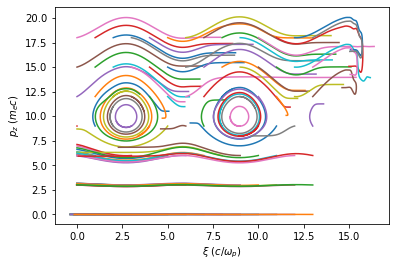

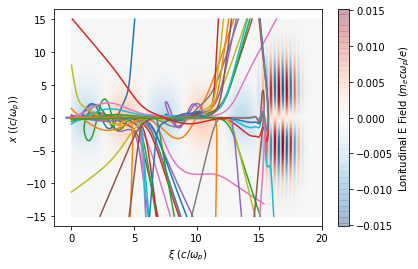

In [28]:
trajectory_linear = np.array(trajectory)
r = np.array(trajectory_linear[:,1])
xi = np.array(trajectory_linear[:,0])
pz = np.array(trajectory_linear[:,3])       
fig, axs = plt.subplots()
for i in range(len(xi)):
    axs.plot(xi[i],pz[i])
axs.set_ylabel('$p_z$ ($m_e c$)')
axs.set_xlabel('$\\xi$ ($c/\\omega_p$)')
plt.savefig("xi_pz.png",dpi=500)  

fig, axs = plt.subplots()
Ez, r_sim,xi_sim =track.dat['e1'],track.axis['r'],track.axis['xi']
colors = axs.pcolormesh(xi_sim,r_sim,Ez,vmin=-Ez.max(),vmax=Ez.max(),cmap="RdBu_r",alpha=0.2)
cbar = fig.colorbar(colors,ax=axs)  
name = 'Lonitudinal E'
cbar.set_label(name +' Field ($m_e c\omega_p / e$)')
for i in range(len(xi)):
    axs.plot(xi[i],r[i])
axs.set_ylabel('$x$ (($c/\\omega_p$))')
axs.set_xlabel('$\\xi$ ($c/\\omega_p$)')
plt.savefig("xi_r.png",dpi=500)  



## 2. Nonlinear Regime

Repeat the steps above

In [32]:
moving_widget('nonlinear')

interactive(children=(Text(value='os-stdin', description='Template Input File:', layout=Layout(width='55%'), s…

In [33]:
dirname = 'nonlinear'
file_id = 3
den_path = [dirname +'/MS/DENSITY/H2elec/charge/charge-H2elec-00000'+str(file_id)+'.h5']
field_obj = ['e1','e2','e3','b1','b2','b3','psi']
field_path = [dirname +'/MS/FLD/'+opt+'/'+opt+'-00000'+str(file_id)+'.h5' for opt in field_obj]
path = field_path+den_path
makeplot(file_id,path,'density')
makeplot(file_id,path,'field')


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x_position', max=5.0, min=-…

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='field_id', max=6.0, step=1.…

The phase velocity is 0.99498743710662 c
Finished!


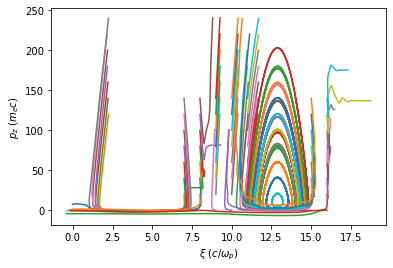

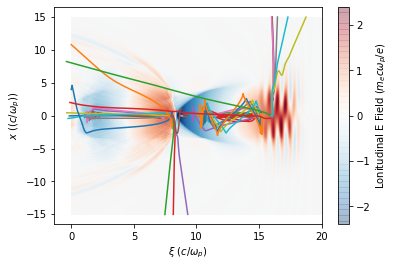

In [39]:
dt = 0.4
step = 5000
omega0 = 10
omegap = 1
vph = math.sqrt(1 - omegap**2/omega0**2)#0.994987
print('The phase velocity is {} c'.format(vph))
trajectory=[]
track=etrack.Tracks(dirname = 'nonlinear')
xi_pos = np.linspace(7., 16, 10)
for xi in xi_pos:
    for pz in range(0,150,20):
        track.set_init_para(r_0=0,xi_0=xi,vph=vph,dtw=dt,pzinit=pz)
        track.run(step)
        trajectory.append(track.result())
print('Finished!')            
     
trajectory = np.array(trajectory)
r = np.array(trajectory[:,1])
xi = np.array(trajectory[:,0])
pz = np.array(trajectory[:,3])       
fig, axs = plt.subplots()
for i in range(len(xi)):
    axs.plot(xi[i],pz[i])
axs.set_ylabel('$p_z$ ($m_e c$)')
axs.set_xlabel('$\\xi$ ($c/\\omega_p$)')
plt.savefig("xi_pz.png",dpi=500)  

fig, axs = plt.subplots()
Ez, r_sim,xi_sim =track.dat['e1'],track.axis['r'],track.axis['xi']
colors = axs.pcolormesh(xi_sim,r_sim,Ez,vmin=-Ez.max(),vmax=Ez.max(),cmap="RdBu_r",alpha=0.2)
cbar = fig.colorbar(colors,ax=axs)  
name = 'Lonitudinal E'
cbar.set_label(name +' Field ($m_e c\omega_p / e$)')
for i in range(len(xi)):
    axs.plot(xi[i],r[i])
axs.set_ylabel('$x$ (($c/\\omega_p$))')
axs.set_xlabel('$\\xi$ ($c/\\omega_p$)')
plt.savefig("xi_r.png",dpi=500)      